In [150]:
import pandas as pd
import numpy as np
import seaborn as sns

In [151]:
file = open("data_description.txt","r")
print(file.read())

1. StudentID: Unique identifier for each student
2. school: Student's school ('GP' - Gombe Prime or 'MS' - Methodist School)
3. sex: Student's sex ('F' - female or 'M' - male)
4. age: Student's age (numeric: from 15 to 22)
5. address: Student's home address type ('U' - urban or 'R' - rural)
6. famsize: Family size ('LE3' - less than or equal to 3 or 'GT3' - greater than 3)
7. pstatus: Parent's cohabitation status ('T' - living together or 'A' - apart)
8. medu: Mother's education level (categorical)
9. fedu: Father's education level (categorical)
10. mjob: Mother's occupation
11. fjob: Father's occupation
12. reason: Reason for choosing the school
13. guardian: Student's guardian ('mother', 'father', or 'other')
14. traveltime: Home to school travel time (numeric: 1 - less than 15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, or 4 - more than 1 hour)
15. studytime: Weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
16. failu

In [152]:
data = pd.read_csv("student_performance.csv")

In [153]:
data.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,745263,GP,F,18,R,GT3,A,Tertiary education,Secondary education,other,...,4,1,1,1,1,very good,15,12.0,9.0,10
1,174740,MS,F,17,U,GT3,T,Tertiary education,Secondary education,at_home,...,4,3,3,2,2,very bad,5,9.0,NaN,11
2,308261,GP,F,15,U,LE3,T,Tertiary education,Secondary education,services,...,4,4,4,1,1,very good,4,12.0,11.0,11
3,337549,MS,F,17,U,GT3,T,Secondary education,Secondary education,other,...,4,5,3,1,1,very good,4,9.0,9.0,10
4,318969,GP,F,17,U,GT3,T,Postgraduate education,Postgraduate education,other,...,4,2,1,1,1,good,0,13.0,13.0,13


In [154]:
data.shape

(544, 34)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    int64  
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    int64  
 4   address     544 non-null    object 
 5   famsize     540 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    int64  
 14  studytime   544 non-null    int64  
 15  failures    544 non-null    int64  
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        539 non-null    object 
 19  activities  544 non-null    o

In [156]:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,541.000000,541.000000,544.000000
mean,545647.773897,17.121324,1.577206,1.904412,0.220588,4.003676,3.198529,3.181985,1.509191,2.283088,3.738971,11.240296,11.632163,11.757353
std,260288.577310,6.399815,0.763771,0.813140,0.581370,2.198272,1.072474,1.269404,0.955698,1.296265,4.790440,2.711007,5.511570,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,150.000000,4.000000,4.000000,3.000000,50.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,120.000000,19.000000


In [157]:
G1 = data["G1"]

In [158]:
G1.mean()

11.24029574861368

In [159]:
data.G1 = data.G1.fillna(data.G1.mean())

In [160]:
G2 = data["G2"]

In [161]:
G2.mean()

11.632162661737523

In [162]:
data.G2 = data.G2.fillna(data.G2.mean())

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    int64  
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    int64  
 4   address     544 non-null    object 
 5   famsize     540 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    int64  
 14  studytime   544 non-null    int64  
 15  failures    544 non-null    int64  
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        539 non-null    object 
 19  activities  544 non-null    o

In [164]:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,545647.773897,17.121324,1.577206,1.904412,0.220588,4.003676,3.198529,3.181985,1.509191,2.283088,3.738971,11.240296,11.632163,11.757353
std,260288.577310,6.399815,0.763771,0.813140,0.581370,2.198272,1.072474,1.269404,0.955698,1.296265,4.790440,2.703508,5.496324,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,150.000000,4.000000,4.000000,3.000000,50.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,120.000000,19.000000


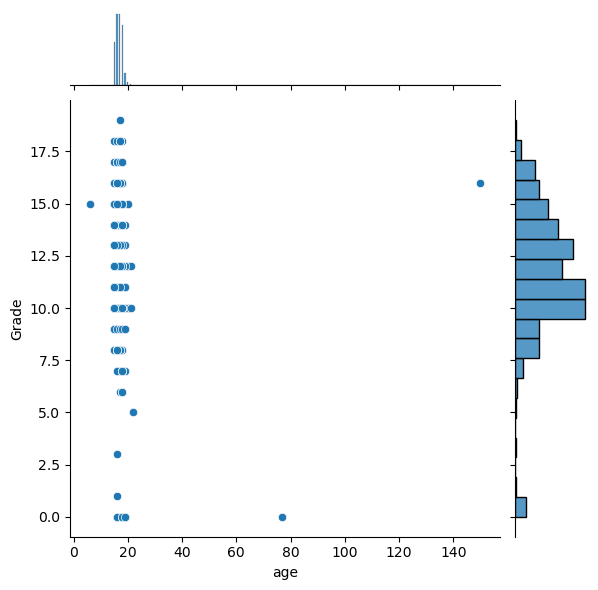

In [165]:
sns.jointplot(x='age', y='Grade', data=data)

In [166]:
np.percentile(data.age,[99])[0]

20.0

In [167]:
np.percentile(data.famrel,[99])[0]

5.0

In [168]:
np.percentile(data.goout,[99])[0]

5.0

In [169]:
np.percentile(data.absences,[99])[0]

21.57000000000005

In [170]:
np.percentile(data.G2,[99])[0]

18.0

In [171]:
uv = np.percentile(data.age,[99])[0]

In [172]:
data[(data.age>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
45,567281,GP,M,150,U,GT3,A,Tertiary education,Postgraduate education,services,...,5,4,4,1,1,very bad,0,16.0,16.0,16
232,584963,MS,F,77,U,GT3,T,Postgraduate education,Secondary education,teacher,...,5,5,5,1,3,very good,0,8.0,8.0,0
285,730271,GP,F,21,U,LE3,T,Postgraduate education,Postgraduate education,other,...,3,3,2,1,1,very good,0,9.0,12.0,12
336,658986,GP,M,22,U,GT3,T,Tertiary education,Primary education,services,...,5,4,5,5,5,very bad,12,7.0,8.0,5
524,398356,GP,M,21,R,LE3,T,Primary education,Primary education,at_home,...,5,3,3,5,2,good,21,9.0,10.0,10


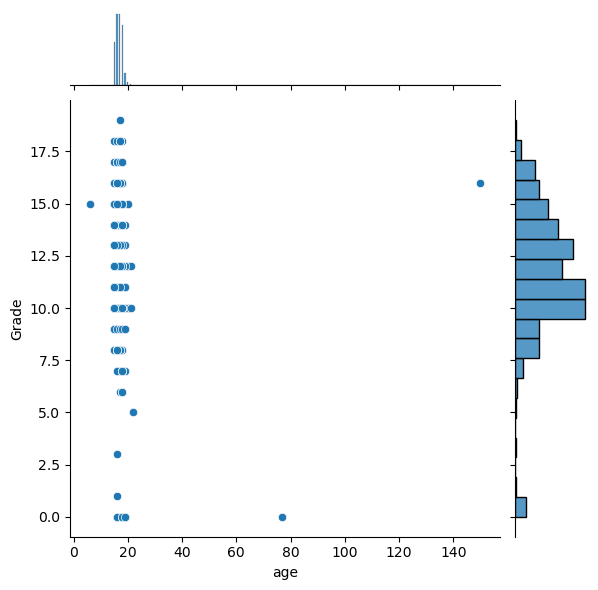

In [173]:
sns.jointplot(x='age', y='Grade', data=data)

In [174]:
uv = np.percentile(data.famrel,[99])[0]

In [175]:
data[(data.famrel>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
543,123247,GP,M,15,U,GT3,T,Postgraduate education,Postgraduate education,services,...,50,3,3,1,1,very good,2,12.0,13.0,12


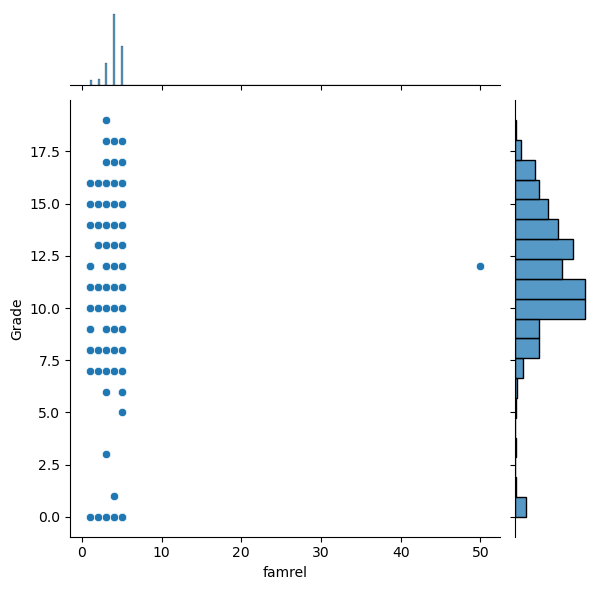

In [176]:
sns.jointplot(x='famrel', y='Grade', data=data)

In [177]:
np.percentile(data.goout,[1])[0]

1.0

In [178]:
lv =np.percentile(data.goout,[1])[0]

In [179]:
data[(data.goout< lv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
431,460032,GP,F,17,U,GT3,A,Secondary education,Secondary education,at_home,...,3,3,-1,1,2,good,18,10.0,12.0,14
455,788519,GP,M,16,R,GT3,T,Postgraduate education,Postgraduate education,teacher,...,3,5,-5,2,5,good,8,14.0,14.0,15
535,653880,MS,M,15,U,GT3,T,Tertiary education,Primary education,other,...,3,2,-3,1,3,good,0,10.0,9.0,11


In [180]:
data.goout[(data.goout<0.3*lv)] = 3*lv

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\2265512505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.goout[(data.goout<0.3*lv)] = 3*lv


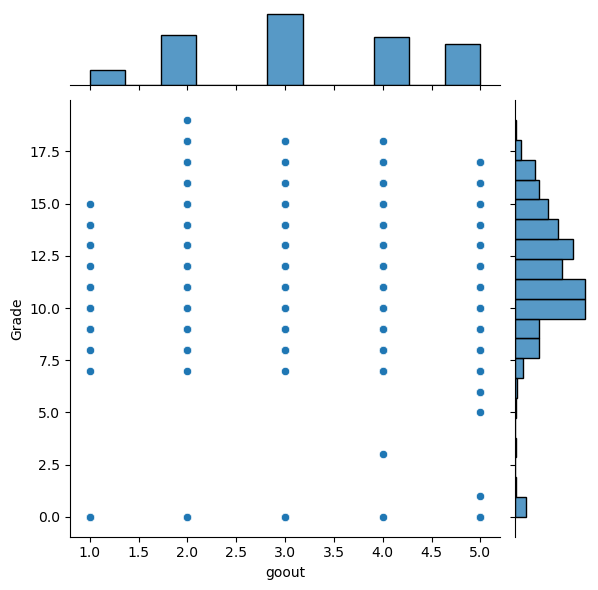

In [181]:
sns.jointplot(x="goout", y='Grade', data=data)

In [182]:
uv = np.percentile(data.absences,[99])[0]

In [183]:
data[(data.absences>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
13,752664,GP,F,17,U,GT3,T,Postgraduate education,Postgraduate education,services,...,4,2,4,2,3,bad,30,14.0,15.0,16
47,999684,GP,M,17,U,GT3,T,Secondary education,Primary education,other,...,5,4,5,1,2,very good,22,9.0,7.0,6
86,369536,GP,M,18,U,GT3,T,Secondary education,Secondary education,other,...,4,4,3,2,2,very bad,26,7.0,8.0,8
304,373109,GP,F,15,U,GT3,A,Tertiary education,Tertiary education,services,...,1,3,2,2,3,very bad,24,9.0,8.0,9
324,786976,GP,M,17,U,LE3,A,Postgraduate education,Primary education,services,...,4,5,4,2,4,very good,22,11.0,11.0,10
396,626981,GP,F,17,U,LE3,T,Tertiary education,Tertiary education,other,...,5,3,3,2,3,very bad,32,14.0,13.0,14


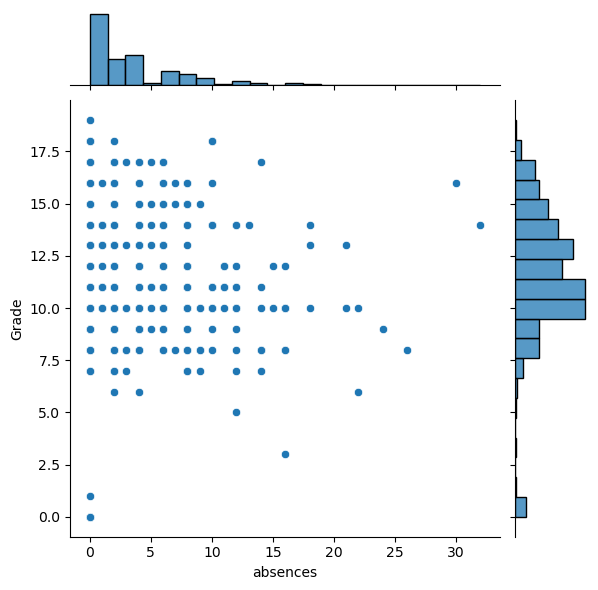

In [184]:
sns.jointplot(x="absences", y='Grade', data=data)

In [185]:
uv = np.percentile(data.G2,[99])[0]

In [186]:
data[(data.G2>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
64,168148,GP,M,15,U,GT3,A,Postgraduate education,Postgraduate education,other,...,1,3,3,5,5,average,0,11.0,120.0,12
164,628787,GP,F,17,R,LE3,T,Tertiary education,Primary education,services,...,3,1,2,1,1,average,0,18.0,19.0,19


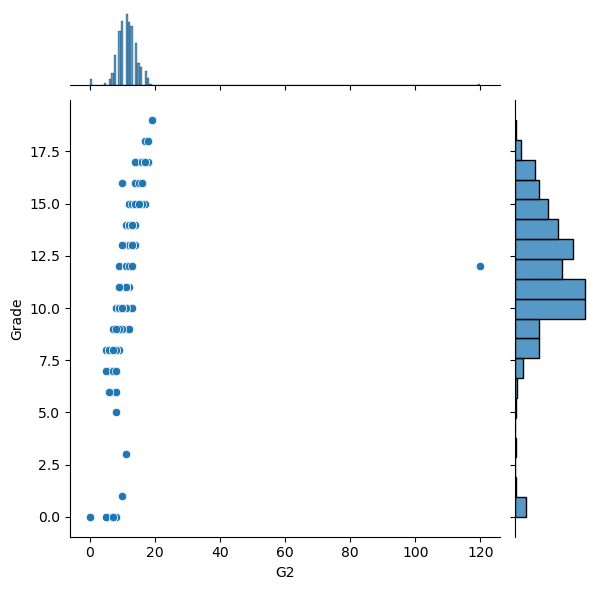

In [187]:
sns.jointplot(x="G2", y='Grade', data=data)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\429999691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.age,  hist=True, kde=True)


<Axes: ylabel='Density'>

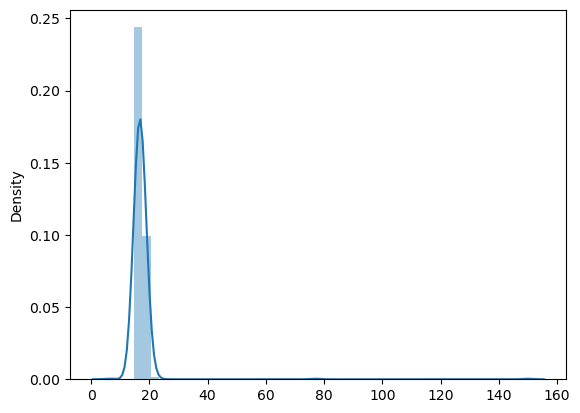

In [188]:
sns.distplot(x =data.age,  hist=True, kde=True)

In [189]:
data.describe

<bound method NDFrame.describe of      StudentID school sex  age address famsize Pstatus  \
0       745263     GP   F   18       R     GT3       A   
1       174740     MS   F   17       U     GT3       T   
2       308261     GP   F   15       U     LE3       T   
3       337549     MS   F   17       U     GT3       T   
4       318969     GP   F   17       U     GT3       T   
..         ...    ...  ..  ...     ...     ...     ...   
539     672843     GP   M   15       U     GT3       T   
540     633556     GP   F   15       U     GT3       T   
541     722794     GP   M   16       U     GT3       T   
542     650929     MS   F   15       R     LE3       T   
543     123247     GP   M   15       U     GT3       T   

                       Medu                    Fedu      Mjob  ... famrel  \
0        Tertiary education     Secondary education     other  ...      4   
1        Tertiary education     Secondary education   at_home  ...      4   
2        Tertiary education     Second

In [190]:
np.log(data.age).describe()

count    544.000000
mean       2.822837
std        0.142388
min        1.791759
25%        2.772589
50%        2.833213
75%        2.890372
max        5.010635
Name: age, dtype: float64

In [191]:
np.log(1+ data.age).describe()

count    544.000000
mean       2.880991
std        0.136743
min        1.945910
25%        2.833213
50%        2.890372
75%        2.944439
max        5.017280
Name: age, dtype: float64

In [192]:
np.sqrt(data.age).describe()

count    544.000000
mean       4.114886
std        0.435181
min        2.449490
25%        4.000000
50%        4.123106
75%        4.242641
max       12.247449
Name: age, dtype: float64

In [193]:
from scipy.stats import boxcox
pd.Series(boxcox(data['age'])[0].tolist()).describe()

count    544.000000
mean       1.161465
std        0.013520
min        0.978902
25%        1.156188
50%        1.163398
75%        1.169899
max        1.287129
dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\429999691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.age,  hist=True, kde=True)


<Axes: ylabel='Density'>

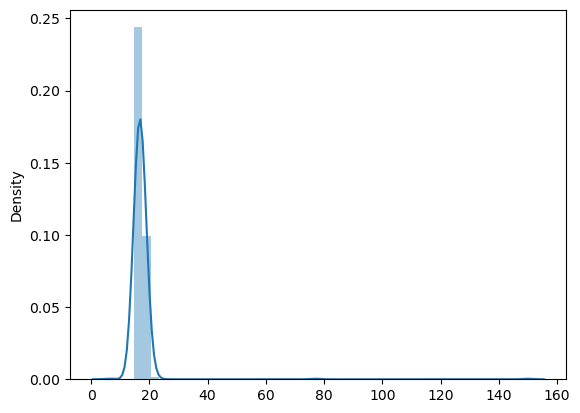

In [194]:
sns.distplot(x =data.age,  hist=True, kde=True)

In [195]:
data.age = np.log(1+data.age)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\429999691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.age,  hist=True, kde=True)


<Axes: ylabel='Density'>

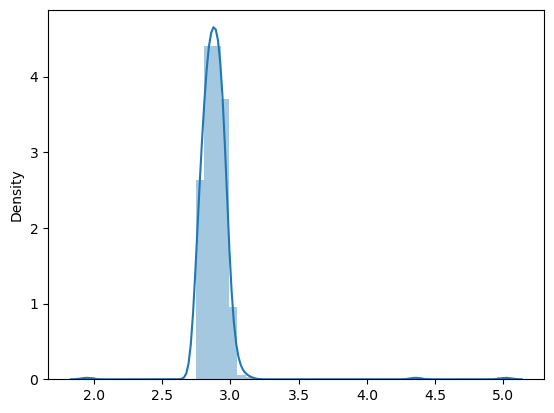

In [196]:
sns.distplot(x =data.age,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\1420039391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.StudentID,  hist=True, kde=True)


<Axes: ylabel='Density'>

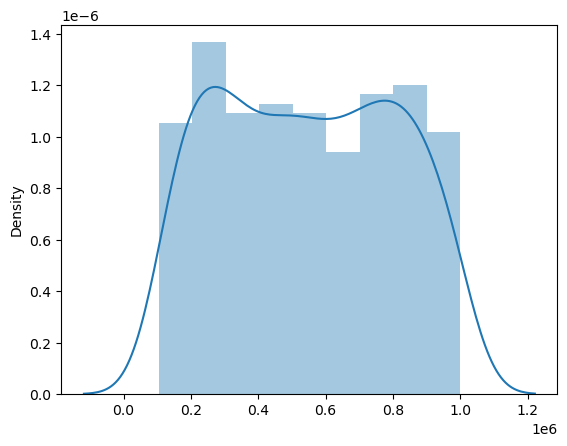

In [197]:
sns.distplot(x =data.StudentID,  hist=True, kde=True)

In [198]:
data.StudentID.describe()

count       544.000000
mean     545647.773897
std      260288.577310
min      104000.000000
25%      314137.000000
50%      546997.000000
75%      764553.750000
max      999684.000000
Name: StudentID, dtype: float64

In [199]:
np.log(1+ data.StudentID).describe()

count    544.000000
mean      13.064061
std        0.582684
min       11.552156
25%       12.657588
50%       13.212200
75%       13.547048
max       13.815196
Name: StudentID, dtype: float64

In [200]:
np.log(1+ data.StudentID).describe()

count    544.000000
mean      13.064061
std        0.582684
min       11.552156
25%       12.657588
50%       13.212200
75%       13.547048
max       13.815196
Name: StudentID, dtype: float64

In [201]:
np.sqrt(data.StudentID).describe()

count    544.000000
mean     714.393900
std      188.026911
min      322.490310
25%      560.479256
50%      739.592359
75%      874.387515
max      999.841988
Name: StudentID, dtype: float64

In [202]:
from scipy.stats import boxcox
pd.Series(boxcox(data['StudentID'])[0].tolist()).describe()

count      544.000000
mean     12161.597144
std       4229.319240
min       4012.787408
25%       8563.995950
50%      12526.716565
75%      15759.759001
max      18940.770627
dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\1420039391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.StudentID,  hist=True, kde=True)


<Axes: ylabel='Density'>

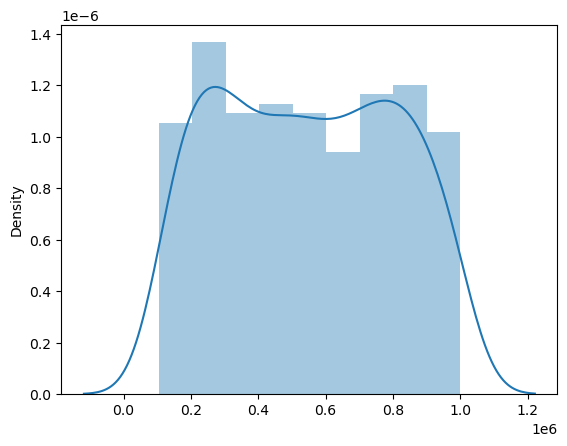

In [203]:
sns.distplot(x =data.StudentID,  hist=True, kde=True)

In [204]:
data.StudentID = np.log(1+data.age)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\1420039391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.StudentID,  hist=True, kde=True)


<Axes: ylabel='Density'>

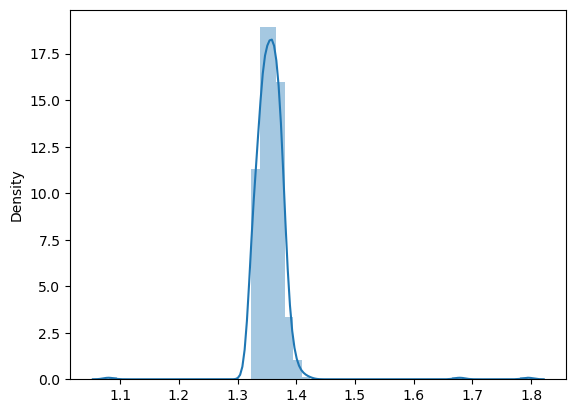

In [205]:
sns.distplot(x =data.StudentID,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3522616901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.studytime,  hist=True, kde=True)


<Axes: ylabel='Density'>

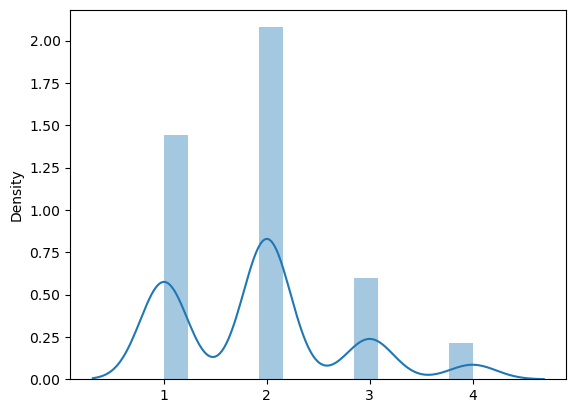

In [206]:
sns.distplot(x =data.studytime,  hist=True, kde=True)

In [207]:
data.studytime.describe()

count    544.000000
mean       1.904412
std        0.813140
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [208]:
np.sqrt(data.studytime).describe()

count    544.000000
mean       1.349290
std        0.289799
min        1.000000
25%        1.000000
50%        1.414214
75%        1.414214
max        2.000000
Name: studytime, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3522616901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.studytime,  hist=True, kde=True)


<Axes: ylabel='Density'>

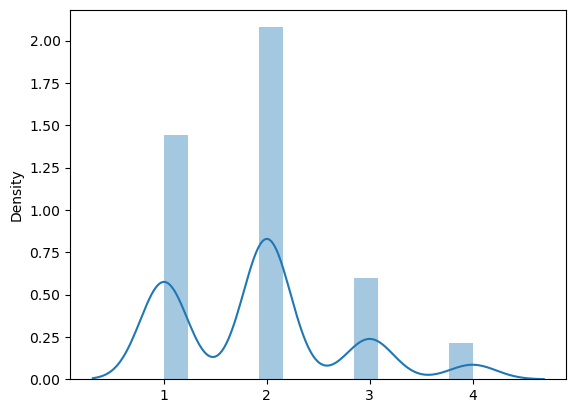

In [209]:
sns.distplot(x =data.studytime,  hist=True, kde=True)

In [210]:
data.traveltime = np.sqrt(data.studytime).describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3916272588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.studytime ,  hist=True, kde=True)


<Axes: ylabel='Density'>

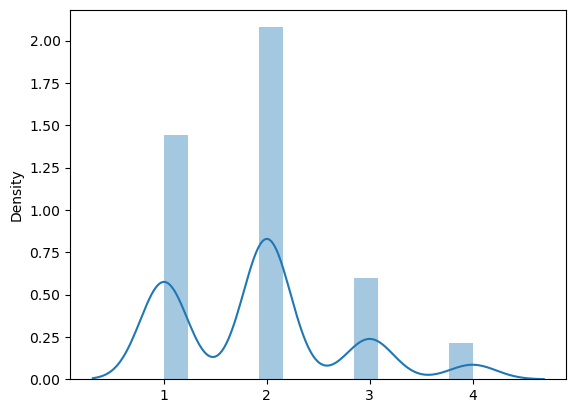

In [211]:
sns.distplot(x =data.studytime ,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\311296697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G2,  hist=True, kde=True)


<Axes: ylabel='Density'>

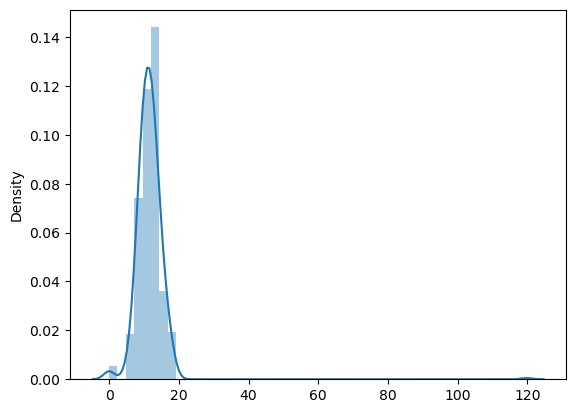

In [212]:
sns.distplot(x =data.G2,  hist=True, kde=True)

In [213]:
data.G2.describe()

count    544.000000
mean      11.632163
std        5.496324
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max      120.000000
Name: G2, dtype: float64

In [214]:
np.log(1+ data.G2).describe()

count    544.000000
mean       2.481675
std        0.368162
min        0.000000
25%        2.397895
50%        2.484907
75%        2.639057
max        4.795791
Name: G2, dtype: float64

In [215]:
data.G2 = np.log(1+data.G2)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\311296697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G2,  hist=True, kde=True)


<Axes: ylabel='Density'>

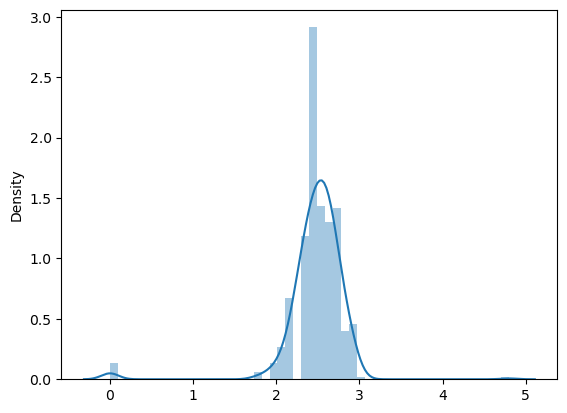

In [216]:
sns.distplot(x =data.G2,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3292514994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G1,  hist=True, kde=True)


<Axes: ylabel='Density'>

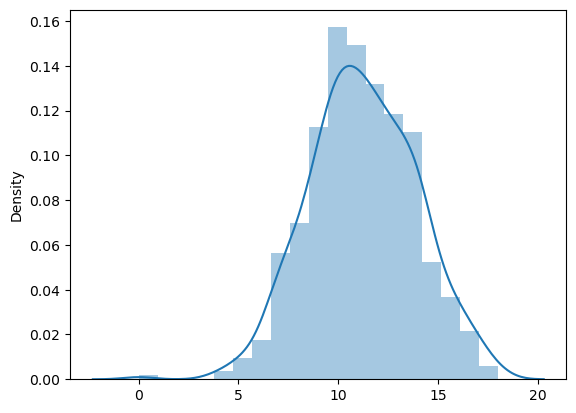

In [217]:
sns.distplot(x =data.G1,  hist=True, kde=True)

In [218]:
data.G1.describe()

count    544.000000
mean      11.240296
std        2.703508
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       18.000000
Name: G1, dtype: float64

In [219]:
np.sqrt(data.G1).describe()

count    544.000000
mean       3.325061
std        0.429655
min        0.000000
25%        3.000000
50%        3.316625
75%        3.605551
max        4.242641
Name: G1, dtype: float64

In [220]:
data.G1 = np.sqrt(data.G1).describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3292514994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G1,  hist=True, kde=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: >

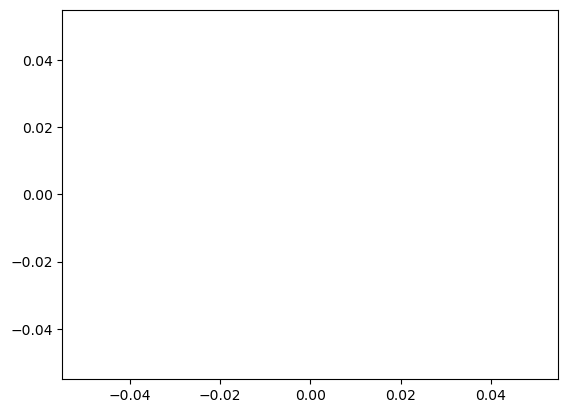

In [221]:
sns.distplot(x =data.G1,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\612596761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Grade,  hist=True, kde=True)


<Axes: ylabel='Density'>

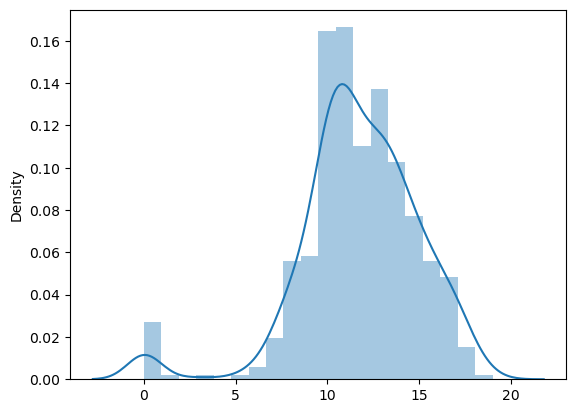

In [222]:
sns.distplot(x =data.Grade,  hist=True, kde=True)

In [223]:
data.Grade.describe()

count    544.000000
mean      11.757353
std        3.274425
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: Grade, dtype: float64

In [224]:
np.log(1+ data.Grade).describe()

count    544.000000
mean       2.481255
std        0.461150
min        0.000000
25%        2.397895
50%        2.564949
75%        2.708050
max        2.995732
Name: Grade, dtype: float64

In [225]:
np.sqrt(data.Grade).describe()

count    544.000000
mean       3.361902
std        0.675135
min        0.000000
25%        3.162278
50%        3.464102
75%        3.741657
max        4.358899
Name: Grade, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\612596761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Grade,  hist=True, kde=True)


<Axes: ylabel='Density'>

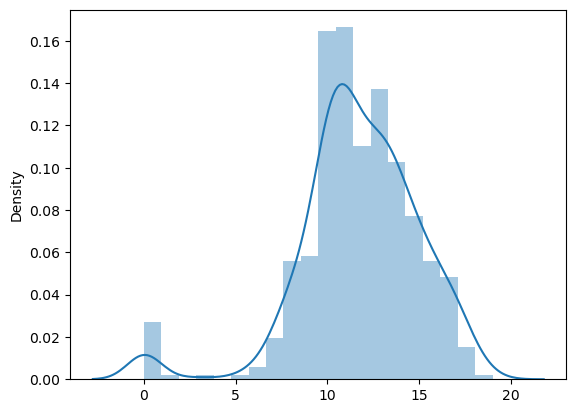

In [226]:
sns.distplot(x =data.Grade,  hist=True, kde=True)

In [227]:
data.Grade = np.sqrt(data.Grade).describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\612596761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Grade,  hist=True, kde=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: >

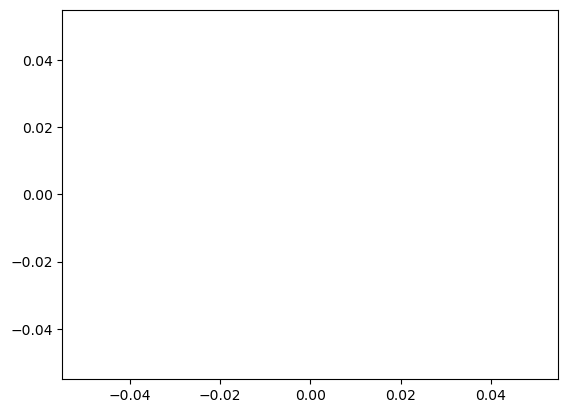

In [228]:
sns.distplot(x =data.Grade,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\383550334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.absences,  hist=True, kde=True)


<Axes: ylabel='Density'>

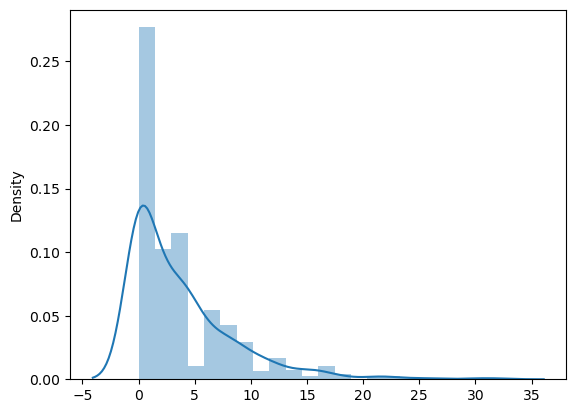

In [229]:
sns.distplot(x =data.absences,  hist=True, kde=True)

In [230]:
data.absences.describe()

count    544.000000
mean       3.738971
std        4.790440
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [231]:
np.log(data.absences).describe()

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    544.000000
mean           -inf
std             NaN
min            -inf
25%             NaN
50%        0.693147
75%        1.791759
max        3.465736
Name: absences, dtype: float64

In [232]:
np.log(1+ data.absences).describe()

count    544.000000
mean       1.093622
std        0.976860
min        0.000000
25%        0.000000
50%        1.098612
75%        1.945910
max        3.496508
Name: absences, dtype: float64

In [233]:
np.sqrt(data.absences).describe()

count    544.000000
mean       1.424202
std        1.309110
min        0.000000
25%        0.000000
50%        1.414214
75%        2.449490
max        5.656854
Name: absences, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\383550334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.absences,  hist=True, kde=True)


<Axes: ylabel='Density'>

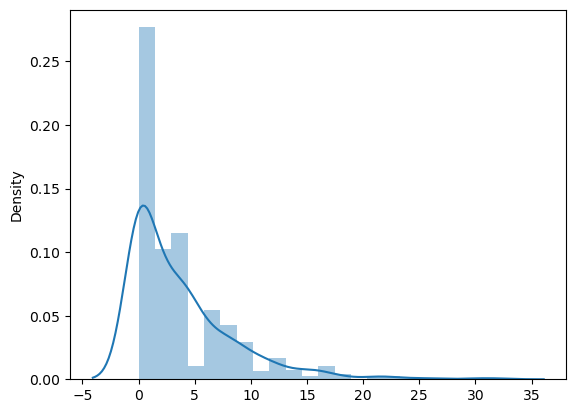

In [234]:
sns.distplot(x =data.absences,  hist=True, kde=True)

In [235]:
data.absences = np.sqrt(data.absences).describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\383550334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.absences,  hist=True, kde=True)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\PC\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: >

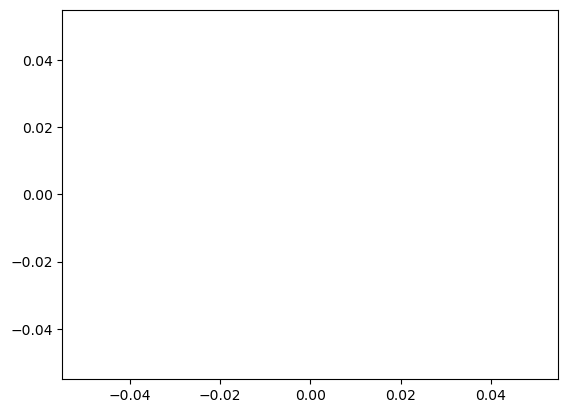

In [236]:
sns.distplot(x =data.absences,  hist=True, kde=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3070914613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.famrel,  hist=True, kde=True)


<Axes: ylabel='Density'>

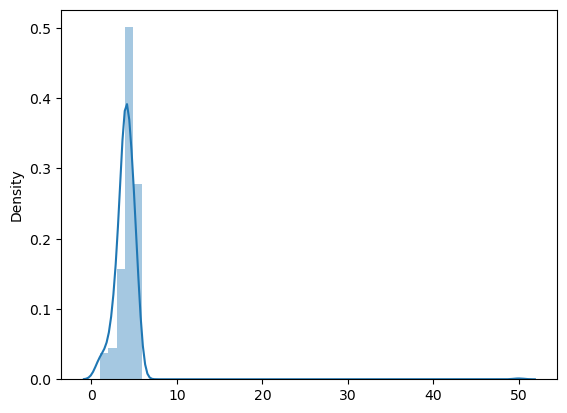

In [238]:
sns.distplot(x =data.famrel,  hist=True, kde=True)

In [239]:
data.famrel.describe()

count    544.000000
mean       4.003676
std        2.198272
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max       50.000000
Name: famrel, dtype: float64

In [240]:
np.log(data.famrel).describe()

count    544.000000
mean       1.325677
std        0.355615
min        0.000000
25%        1.386294
50%        1.386294
75%        1.609438
max        3.912023
Name: famrel, dtype: float64

In [241]:
np.log(1+ data.famrel).describe()

count    544.000000
mean       1.572630
std        0.260376
min        0.693147
25%        1.609438
50%        1.609438
75%        1.791759
max        3.931826
Name: famrel, dtype: float64

In [242]:
np.sqrt(data.famrel).describe()

count    544.000000
mean       1.969563
std        0.353165
min        1.000000
25%        2.000000
50%        2.000000
75%        2.236068
max        7.071068
Name: famrel, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3070914613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.famrel,  hist=True, kde=True)


<Axes: ylabel='Density'>

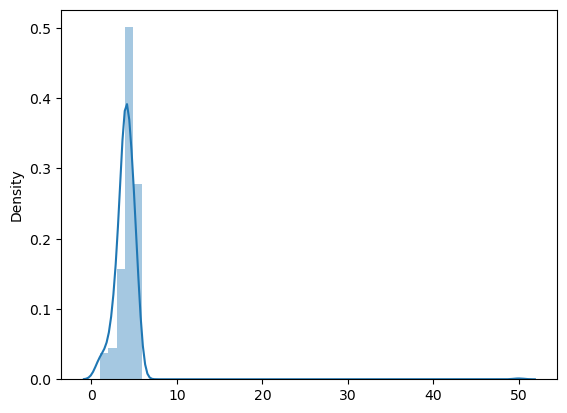

In [245]:
sns.distplot(x =data.famrel,  hist=True, kde=True)

In [250]:
data.famrel = np.log(data.famrel).describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_34876\3070914613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.famrel,  hist=True, kde=True)


<Axes: ylabel='Density'>

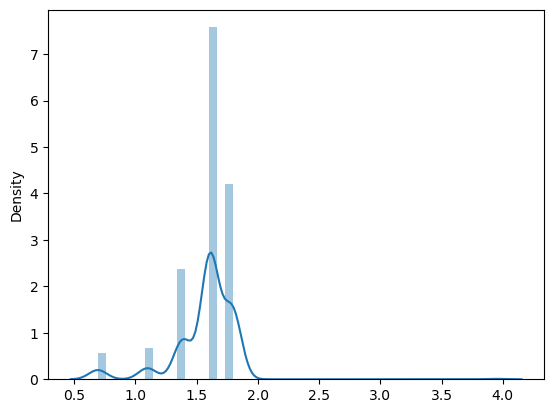

In [248]:
sns.distplot(x =data.famrel,  hist=True, kde=True)